# MNIST MLP models

## The simplest model

Our first and simplest model is called the __MLPZero__ (`models.MLP.MLPZero`). It has 784 (height * width) inputs and 10 (the digits) outputs. The neurons are fully connected and there is no non-linear activation function.

![MLPZero](./report/mlp_zero/architecture.png)

We first trained the network on the train dataset while monitoring accuracy and loss for both the train set and the validation set. We chose standard hyperparameters: 100 epochs, a learning rate of 0.01, a batch size of 32, the pytorch SGD solver, and the cross-entropy loss function.

Let us look at the first results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

res = pd.read_csv('results/mlp_zero.csv', index_col=0, usecols=[0,2,3,4,5,6])
res.head()

,epoch,loss,val_loss,accuracy,val_accuracy
0,1,0.4256,0.3482,0.8801,0.9003
1,2,0.3697,0.3361,0.8953,0.9053
2,3,0.3453,0.3290,0.9021,0.9081
3,4,0.3305,0.3250,0.9063,0.9097
4,5,0.3205,0.3220,0.9091,0.9106


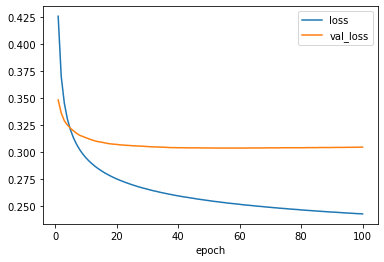

In [2]:
res.plot(x='epoch', y=['loss', 'val_loss'])
plt.show()


We do not notice the typical U-shaped curve for the validation loss, but it is increasing slightly. It implies that our model starts to overfit a little when we get around the 30th epoch.

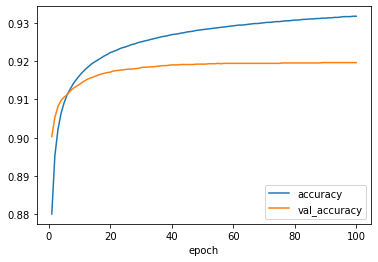

In [3]:
res.plot(x='epoch', y=['accuracy', 'val_accuracy'])
plt.show()

Our simple model performs very well, even without an non-linear activation function. On the test set, the accuracy is over 93% and oscilliates between 91% and 92% on the validation set. But more interestingly is how well it performs on the holdback set.

In [4]:
import helpers.mnist_loader as mld
import helpers.evaluation as e
from models.MLP import MLPZero

t_set, v_set, hb_set = mld.loadMNISTDatasets()
_,_, hb_loader = mld.getMNISTLoaders([t_set, v_set, hb_set], batch_size=32)

mlp_zero = e.loadModel(modelClass=MLPZero(),   name="model_MLPZero_learning_rate_0.01_batch_size_32_optimizer_sgd")
mlp_zero

MLPZero(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)

In [6]:
from torch.nn.functional import cross_entropy

e.validate(mlp_zero, cross_entropy, hb_loader);


HoldBackSet: Avg. loss: 0.0085, Accuracy: 0.9231 (92.3%)



### Playing with parameters

Using our `TrainingGuider`, we can easily play with the hyperparamters. We added a _ReLu_ activation function to the model too, the `MLPZeroReLu`.

We have explored:

- Training rate: 0.01, 0.05, 0.1
- Batch size: 32, 64

We reduced the number of epochs to 40, since the gain from more was negligeable and we also care for the planet.


In [7]:
res = pd.read_csv('./results/mlp_zero_params.csv', index_col=0)
res.head()

,case,epoch,loss,val_loss,accuracy,val_accuracy,learning_rate,batch_size,optimizer,model
0,1,1,0.4271,0.3248,0.8810,0.9073,0.01,32,sgd,MLPZero
1,1,2,0.3733,0.3145,0.8948,0.9101,0.01,32,sgd,MLPZero
2,1,3,0.3495,0.3072,0.9013,0.9129,0.01,32,sgd,MLPZero
3,1,4,0.3352,0.3025,0.9054,0.9141,0.01,32,sgd,MLPZero
4,1,5,0.3254,0.2995,0.9083,0.9147,0.01,32,sgd,MLPZero


In [15]:
subres = res[(res.case == 7) | (res.case == 1)]

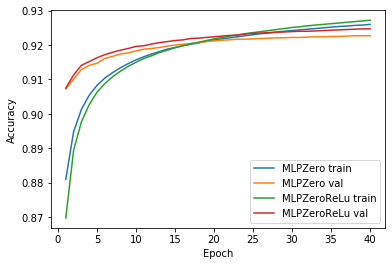

In [19]:
mz = subres[(subres.model == 'MLPZero')]
mzr = subres[(subres.model == 'MLPZeroReLu')]
x =  mz.epoch
# plotting the line 1 points 
plt.plot(x, mz.accuracy, label = "MLPZero train")
plt.plot(x, mz.val_accuracy, label = "MLPZero val")
plt.plot(x, mzr.accuracy, label = "MLPZeroReLu train")
plt.plot(x, mzr.val_accuracy, label = "MLPZeroReLu val")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

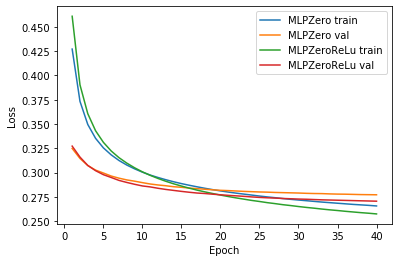

In [21]:
plt.plot(x, mz.loss, label = "MLPZero train")
plt.plot(x, mz.val_loss, label = "MLPZero val")
plt.plot(x, mzr.loss, label = "MLPZeroReLu train")
plt.plot(x, mzr.val_loss, label = "MLPZeroReLu val")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [ ]:
subres = res[(res.case == 1) | (res.case == 2)]